In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, models, layers

In [19]:
tf.onednn = 1

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
(training_images, training_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()


In [22]:
training_images=training_images.reshape(60000,28,28,1)
test_images=test_images.reshape(10000,28,28,1)

In [23]:
training_images, test_images = training_images / 255.0, test_images / 255.0

In [24]:
tf.config.optimizer.set_jit(True)
tf.config.optimizer.set_experimental_options({"auto_mixed_precision": True})

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')


])

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [28]:
import visualkeras

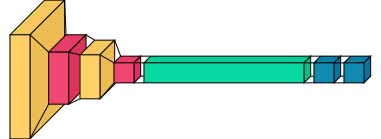

In [29]:
visualkeras.layered_view(model)

In [ ]:
history = model.fit(training_images, training_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5


2023-07-16 22:35:03.648101: W tensorflow/core/grappler/optimizers/auto_mixed_precision.cc:2303] No (suitable) GPUs detected, skipping auto_mixed_precision graph optimizer
2023-07-16 22:35:03.651759: W tensorflow/core/grappler/optimizers/auto_mixed_precision.cc:2303] No (suitable) GPUs detected, skipping auto_mixed_precision graph optimizer
2023-07-16 22:35:03.654935: W tensorflow/core/grappler/optimizers/auto_mixed_precision.cc:2303] No (suitable) GPUs detected, skipping auto_mixed_precision graph optimizer


  10/1875 [..............................] - ETA: 22s - loss: 2.1692 - accuracy: 0.2812 

2023-07-16 22:35:04.217220: W tensorflow/core/grappler/optimizers/auto_mixed_precision.cc:2303] No (suitable) GPUs detected, skipping auto_mixed_precision graph optimizer


1873/1875 [============================>.] - ETA: 0s - loss: 0.4435 - accuracy: 0.8390

2023-07-16 22:35:25.961477: W tensorflow/core/grappler/optimizers/auto_mixed_precision.cc:2303] No (suitable) GPUs detected, skipping auto_mixed_precision graph optimizer
2023-07-16 22:35:25.964985: W tensorflow/core/grappler/optimizers/auto_mixed_precision.cc:2303] No (suitable) GPUs detected, skipping auto_mixed_precision graph optimizer
2023-07-16 22:35:25.968919: W tensorflow/core/grappler/optimizers/auto_mixed_precision.cc:2303] No (suitable) GPUs detected, skipping auto_mixed_precision graph optimizer
2023-07-16 22:35:26.029083: W tensorflow/core/grappler/optimizers/auto_mixed_precision.cc:2303] No (suitable) GPUs detected, skipping auto_mixed_precision graph optimizer


1875/1875 [==============================] - 24s 12ms/step - loss: 0.4434 - accuracy: 0.8390 - val_loss: 0.3492 - val_accuracy: 0.8749
Epoch 2/5
1871/1875 [============================>.] - ETA: 0s - loss: 0.2978 - accuracy: 0.8918

2023-07-16 22:35:49.143595: W tensorflow/core/grappler/optimizers/auto_mixed_precision.cc:2303] No (suitable) GPUs detected, skipping auto_mixed_precision graph optimizer
2023-07-16 22:35:49.148036: W tensorflow/core/grappler/optimizers/auto_mixed_precision.cc:2303] No (suitable) GPUs detected, skipping auto_mixed_precision graph optimizer
2023-07-16 22:35:49.152223: W tensorflow/core/grappler/optimizers/auto_mixed_precision.cc:2303] No (suitable) GPUs detected, skipping auto_mixed_precision graph optimizer


1875/1875 [==============================] - 23s 12ms/step - loss: 0.2976 - accuracy: 0.8919 - val_loss: 0.2857 - val_accuracy: 0.8939
Epoch 3/5
1875/1875 [==============================] - ETA: 0s - loss: 0.2510 - accuracy: 0.9075

2023-07-16 22:36:12.442580: W tensorflow/core/grappler/optimizers/auto_mixed_precision.cc:2303] No (suitable) GPUs detected, skipping auto_mixed_precision graph optimizer
2023-07-16 22:36:12.448769: W tensorflow/core/grappler/optimizers/auto_mixed_precision.cc:2303] No (suitable) GPUs detected, skipping auto_mixed_precision graph optimizer
2023-07-16 22:36:12.454260: W tensorflow/core/grappler/optimizers/auto_mixed_precision.cc:2303] No (suitable) GPUs detected, skipping auto_mixed_precision graph optimizer


1875/1875 [==============================] - 23s 12ms/step - loss: 0.2510 - accuracy: 0.9075 - val_loss: 0.2633 - val_accuracy: 0.9033
Epoch 4/5
 798/1875 [===========>..................] - ETA: 12s - loss: 0.2120 - accuracy: 0.9201

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [ ]:
print("Test Accuracy:", test_acc)

In [ ]:
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import label_binarize

In [ ]:
test_predictions = model.predict(test_images)

In [ ]:
# Compute confusion matrix
import seaborn as sns
cm = confusion_matrix(test_labels, np.argmax(test_predictions, axis=1))
print("Confusion Matrix:")

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
# Compute classification report
print("Classification Report:")
print(classification_report(test_labels, np.argmax(test_predictions, axis=1)))

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve((test_labels == i).astype(int), test_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
plt.figure()
for i in range(10):
    plt.plot(fpr[i], tpr[i], label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

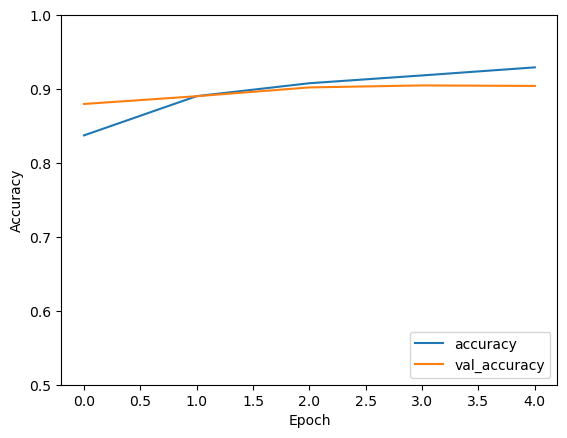

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')


In [23]:
# Assuming you have already trained your model and stored it in the 'model' variable
# Assuming you have already reshaped and normalized your test_images

# Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = np.mean(predicted_labels == test_labels)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = tf.keras.metrics.Precision()(test_labels, predicted_labels).numpy()
recall = tf.keras.metrics.Recall()(test_labels, predicted_labels).numpy()
f1_score = 2 * (precision * recall) / (precision + recall)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)


In [24]:
def calculate_iou(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred)
    union = np.logical_or(y_true, y_pred)
    iou = np.sum(intersection) / np.sum(union)
    return iou

2023-07-15 10:38:01.583247: W tensorflow/core/grappler/optimizers/auto_mixed_precision.cc:2303] No (suitable) GPUs detected, skipping auto_mixed_precision graph optimizer
2023-07-15 10:38:01.588066: W tensorflow/core/grappler/optimizers/auto_mixed_precision.cc:2303] No (suitable) GPUs detected, skipping auto_mixed_precision graph optimizer
2023-07-15 10:38:01.593414: W tensorflow/core/grappler/optimizers/auto_mixed_precision.cc:2303] No (suitable) GPUs detected, skipping auto_mixed_precision graph optimizer


  7/313 [..............................] - ETA: 6s

2023-07-15 10:38:01.823844: W tensorflow/core/grappler/optimizers/auto_mixed_precision.cc:2303] No (suitable) GPUs detected, skipping auto_mixed_precision graph optimizer


313/313 [==============================] - 8s 26ms/step


In [ ]:
iou_scores = []
for i in range(len(test_images)):
    y_true = tf.one_hot(test_labels[i], depth=10)
    y_pred = test_predictions[i]
    iou = calculate_iou(y_true, y_pred)
    iou_scores.append(iou)


In [ ]:
average_iou = np.mean(iou_scores)
print("Average IoU:", average_iou)